In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Handle duplicate values

In [2]:
l = [1,2,3,4,4,4,5,5,6,7,8]

In [3]:
set(l)

{1, 2, 3, 4, 5, 6, 7, 8}

In [4]:
x = np.array([1,2,3,4,4,4,5,5,6,7,8])

In [5]:
np.unique(x)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [6]:
df = pd.DataFrame({'col1':[1,2,2],
                   'col2':[2,3,3],
                   'col3':[3,2,2]})

In [7]:
df

,col1,col2,col3
0,1,2,3
1,2,3,2
2,2,3,2


In [8]:
df.drop_duplicates()

,col1,col2,col3
0,1,2,3
1,2,3,2


In [9]:
df[-df.duplicated()]

,col1,col2,col3
0,1,2,3
1,2,3,2


## 2. 
You are given two tables - friend_request and request_accepted. Friend_request contains requester_id, time and sent_to_id and request_accepted table contains time, acceptor_id and requestor_id. How will you determine the overall acceptance rate of requests? (Write in both Python and SQL) 


In [ ]:
#SQL
SELECT SUM(IF(ra.acceptor_id is NULL,0,1))/SUM(1) AS acceptance_rate
FROM friend_request fr LEFT JOIN request_accepted ra ON ra.requester_id=fr.requester_id 
AND ra.acceptor_id=fr.sent_to_id;

In [ ]:
#Python
df = pd.merge(df_fr,df_ra,how='left',left_on=['requester_id','sent_to_id'],\
                     right_on=['requester_id','acceptor_id'])
acceptance_rate = len(df['acceptor_id'][df.acceptor_id>0])/df.shape[0]

## 3.

“Issuer” of a credit card are companies like Visa, Mastercard, American Express. Now we know the following rules:

CC number starts with: '4'
CC len : 16
Issuer: VISA

CC number starts with: '34', '37'
CC len : 15
Issuer : AMEX

CC number starts with: '36'
CC len : 14
Issuer : Diners Club

Credit card number starts with
'4026', '417500', '4405', '4508', '4844',
'4913', '4917'
CC len : 16
Issuer : VISAELECTRON

Now write Python scripts to identify the issuer of the following credit card numbers:

'4175004175004172' 
'4917491749174917'
'346416800707698'
'376416800707698'
'37641680070769832112'
'36641680070769'
'54545641680070769’ 


In [10]:
def issuer_identifier(num):
    l = ['4026', '4405', '4508', '4844','4913', '4917']
    if len(num)==16 and num[0]=='4':
        if (num[0:4] in l) or (num[0:6]=='417500'):
            return 'VISAELECTRON'
        else:
            return 'VISA'
    elif len(num)==15 and (num[0:2]=='34' or num[0:2]=='37'):
        return 'AMEX'
    elif len(num)==14 and num[0:2]=='36':
        return 'Diners Club'
    else:
        return 'N/A'

In [11]:
card_num = ['4175004175004172', 
'4917491749174917',
'346416800707698',
'376416800707698',
'37641680070769832112',
'36641680070769',
'54545641680070769']

for num in card_num:
    print 'The issuer of "{}": {}'.format(num,issuer_identifier(num))

The issuer of "4175004175004172": VISAELECTRON
The issuer of "4917491749174917": VISAELECTRON
The issuer of "346416800707698": AMEX
The issuer of "376416800707698": AMEX
The issuer of "37641680070769832112": N/A
The issuer of "36641680070769": Diners Club
The issuer of "54545641680070769": N/A


## 4. 
Write a Python function called PrintCumulativeTimeSeries(). Specifically:

The function takes three inputs:
data
experiment_id
country

The function produces two outputs:
A time series chart showing the cumulative uplift (hint: search for cumsum)
Print out the cumulative % uplift on revenue, experiment vs. control. Hint: (red - blue) / blue %


In [12]:
data = pd.read_csv('BA501_python_data.csv')

In [13]:
data.head()

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,20170402,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,20170403,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,20170404,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,20170403,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,20170403,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [14]:
data.date = pd.to_datetime(data.date,format='%Y%m%d')

In [15]:
data.head()

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,2017-04-02,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,2017-04-03,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,2017-04-04,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,2017-04-03,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,2017-04-03,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [16]:
def GetCumulativeSeries(data, exp_id, country):
    df = data[['date','spend_usd']][(data.experiment_id == exp_id) &(data.country == country)]
    series = df.groupby('date')['spend_usd'].sum()
    series = np.cumsum(series)
    total_revenue = series[-1]
    return series,total_revenue

def PlotSeries(experiment_series, control_series):
    fig,ax = plt.subplots()
    ax.plot(experiment_series, color='red',label='experiment')
    ax.plot(control_series, color='blue',label='control')
    ax.set_title('EXPERIMENT VS. CONTROL')
    ax.set_ylabel('Total Spend')
    ax.grid(True,which='both')
    ax.legend()
    plt.gcf().autofmt_xdate()
    
def PrintCumulativeTimeSeries(data, exp_id, country):
    TreatmentSeries = GetCumulativeSeries(data, exp_id[0], country)[0]
    ControlSeries = GetCumulativeSeries(data, exp_id[1], country)[0]
    TreatmentRevenue = GetCumulativeSeries(data, exp_id[0], country)[1]
    ControlRevenue = GetCumulativeSeries(data, exp_id[1], country)[1]
    
    print 'Cumulative Revenue Impact:'+ str((float(TreatmentRevenue-ControlRevenue)/ControlRevenue)*100) +'%'
    PlotSeries(TreatmentSeries, ControlSeries)

In [17]:
exp_id = np.unique(data.experiment_id)

In [18]:
exp_id

array([12624548, 12624549])

Cumulative Revenue Impact:-4.46580818946%


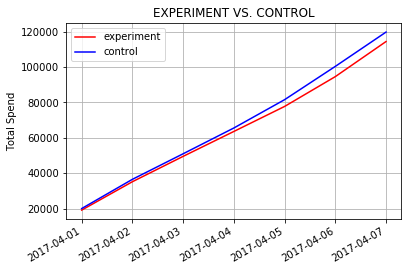

In [19]:
PrintCumulativeTimeSeries(data,exp_id,'US')